In [47]:
random_seed = 0

1. Clustering
   - Useful for data analysis, customer categorization, recommendation system, search engine
2. Outlier Detection
   - Also can be used for finding new trend in a time series data
3. Desity Inference
   - inference the probability density function of the random process


### Cluster Plot function


In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

# 9.1 Clustering


### 9.1.1 k-mean

- finds the centroid of each cluster and assign the sample to the closest sample


In [ ]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [ ]:
print(f"centroids: {kmeans.cluster_centers_}")

X_new = np.array([[0,2], [3,2 ], [-3,3], [-3, 2.5]])   
print(f"prediction of cluster for each sample: {kmeans.predict(X_new)}")
print(f"inertia: {kmeans.inertia_}")
print(f"score(neg intertia): {kmeans.score(X)}")

centroids: [[-0.066884    2.10378803]
 [-2.79290307  2.79641063]
 [-2.80214068  1.55162671]
 [-1.47468607  2.28399066]
 [ 0.47042841  2.41380533]]
prediction of cluster for each sample: [0 4 1 1]
inertia: 224.07433122515727
score(neg intertia): -224.07433122515727


### Screeplot


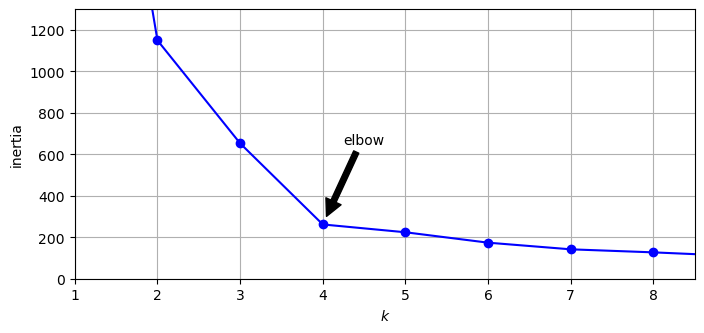

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()


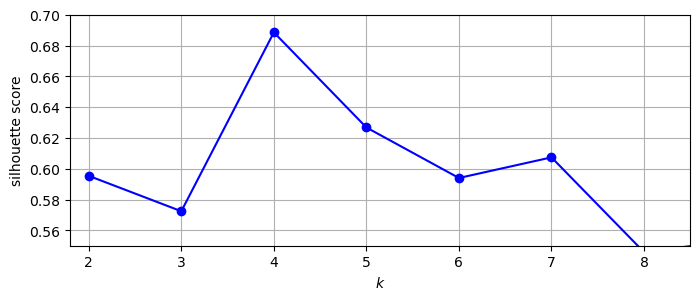

In [12]:
from sklearn.metrics import silhouette_score
# 추가 코드 - 이 셀은 그림 9-9를 생성하고 저장합니다.

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

### Silhouette Diagram

- better to choose k which gives similar silhouette score for each cluster


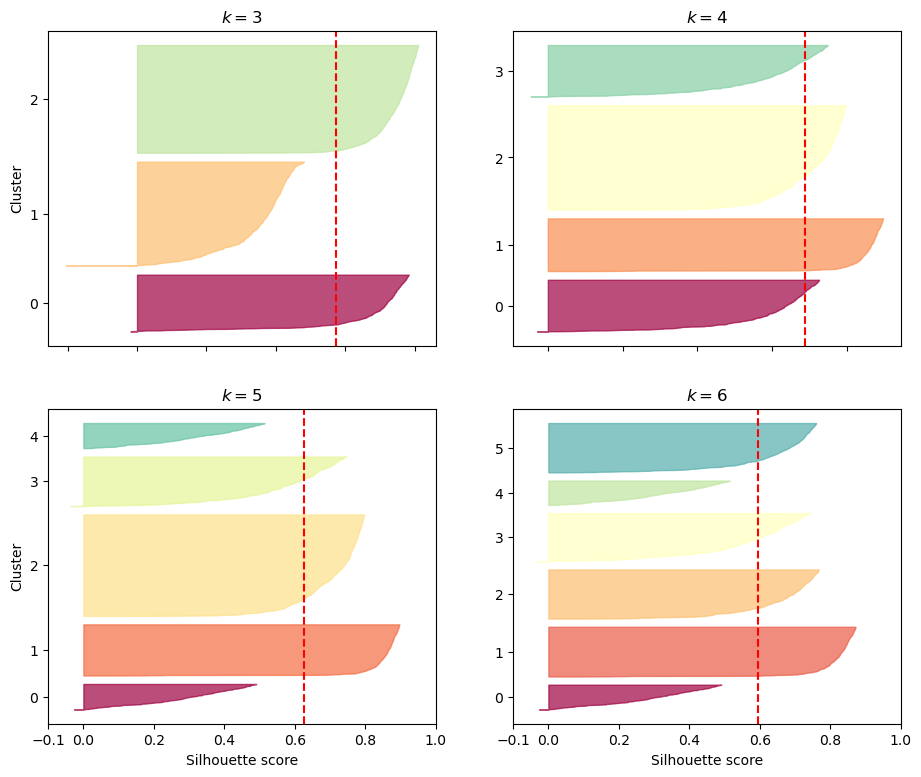

In [13]:
# 추가 코드 - 이 셀은 그림 9-10을 생성하고 저장합니다.

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette score")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

### 9.1.4 Semi-supervised learning with clustering

- Usefule when data with label are small, but data without labels are many
- find the **representative image**


In [37]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

# Get Data
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]


# Pretend have only 50 labels
n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

print(f"Logistic regression score with 50 labels: {log_reg.score(X_test, y_test)}")

Logistic regression score with 50 labels: 0.7581863979848866


#### Select the representative image


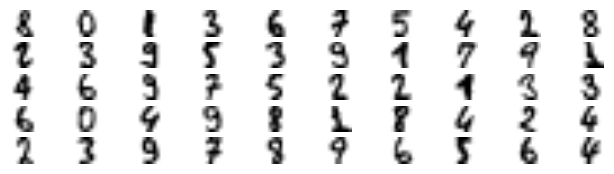

Logistic regression score with representative image: 0.8337531486146096


In [40]:
# finding the representative image
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
# Compute the distance to the each centroid
X_digits_dist = kmeans.fit_transform(X_train)
# find the sample which closest to the centroid
representative_digit_idx = X_digits_dist.argmin(axis=0)
# select the representative image
X_representative_digits = X_train[representative_digit_idx]

# 추가 코드 - 이 셀은 그림 9-13을 생성하고 저장합니다.

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')


plt.show()

# manually look the image, and assign the representative digits
y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4
])

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)

print(f"Logistic regression score with representative image: {log_reg.score(X_test, y_test)}")

#### Label Propagation


In [ ]:
# Label propagation
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]
    
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

print(f"Logistic regression score with representative image with label propagation: {log_reg.score(X_test, y_test)}")

Logistic regression score with representative image: 0.8664987405541562


#### ignore far samples


In [44]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]


log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

print(f"Logistic regression score with representative image with label propagation and drop far 1%: {log_reg.score(X_test, y_test)}")

Logistic regression score with representative image with label propagation and drop far 1%: 0.8589420654911839


### 9.1.5 DBSCAN

- 알고리즘 과정

  - 알고리즘이 각 샘플에서 작은 거리인 e 내 샘플이 몇개 놓여있늕지 센후, 이 지역의 샘플을 e이웃이라고 명칭
  - 자기 자신을 포함한 e이웃 내 적어도 min_samples개 샘플이 있으면 이를 **핵심 샘플**로 간주. 즉, 핵심 샘플을 밀집된 지역에 있는 샘플
  - 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속함. 이웃에는 다른 핵심 샘플이 포함될 수 있음. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 생성
  - 핵심 샘플이 아니고, 이웃도 아닌 샘플은 이상치로 판단

- DBSCAN은 모든 클러스ㅓ가 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 냄


In [52]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=random_seed)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# all labels from the sample are stored in the labels_ variable
# index -1 are the outliers
print(f"Labels: {dbscan.labels_[:10]}")

# index of the core smaple
print(f"Index of the core smaple: {dbscan.core_sample_indices_[:10]}")

# core samples
print(f"Core samples: {dbscan.components_[:10]}")

Labels: [ 2  0  4 -1  1  2  3  4  5  1]
Index of the core smaple: [ 1  4  5  6  7  8 10 11 12 14]
Core samples: [[ 1.6782009  -0.20198687]
 [ 0.50484202 -0.3910431 ]
 [ 1.96953895  0.36005521]
 [ 0.95659588  0.2536649 ]
 [ 0.0948788   0.98337847]
 [-0.4416603   0.87203428]
 [-1.05224971  0.04748077]
 [ 0.07344505  0.18232956]
 [ 1.32059444 -0.50906259]
 [ 0.10374309  0.01069576]]


#### Plot DBSCAN with different epsilon


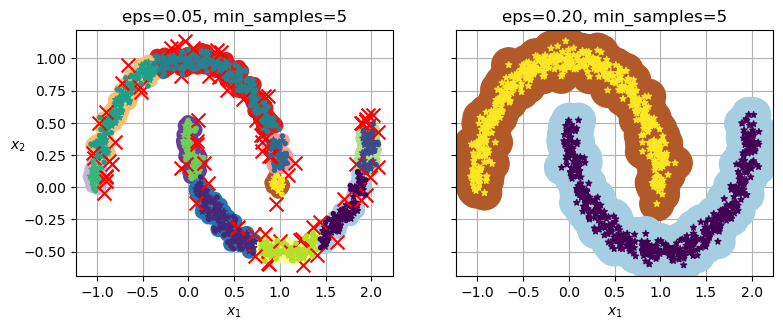

In [59]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

dbscan = dbscan2

#### Predict new values by fitting data with another classifier


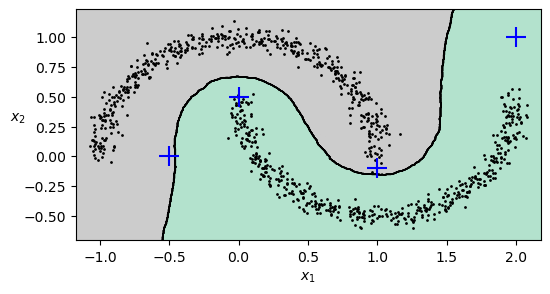

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

knn.predict_proba(X_new)


plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()